In [3]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Skripsi/DataOlah.xlsx')
pd.DataFrame(df)

,No,deskripsi,kategori,Label
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0
...,...,...,...,...
695,696,Persyaratan :Lokasi: Jawa Barat dan Jawa Timur...,Teknik,6
696,697,:Melakukan maintenance VSAT terhadap lokasi ya...,Teknik,6
697,698,Yang Akan Anda Lakukan :Bertanggung jawab terh...,Teknik,6
698,699,Pendidikan Minimal SMK Jurusan Alat Berat Peng...,Teknik,6


In [ ]:
#Case Folding

def casefolding(text):
  text = text.lower()
  return text
df['casefolding'] = df['deskripsi'].apply(casefolding)
df.head()

,No,deskripsi,kategori,Label,casefolding
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da..."


In [ ]:
# Tahap cleansing text
import re
import string
def cleansing(Text):
  # Menghapus URL atau tautan web
  Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)

  # Menghapus karakter tanda kutip ganda
  Text = re.sub('&quot;'," ", Text)

  # Menghapus angka
  Text = re.sub(r"\d+", " ", str(Text))

  # Menghapus kata yang hanya terdiri dari satu huruf
  Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))

  # Menggabungkan dua atau lebih karakter berurutan yang sama
  Text = re.sub(r'(.)\1+', r'\1\1', Text)

  # Menghapus karakter non-alphanumerik dan non-spasi
  Text = re.sub(r"[^\w\s]", " ", str(Text))

  # Mengganti dua atau lebih spasi dengan satu spasi
  Text = re.sub(r"\s+", " ", str(Text))

  # Menghapus karakter hastag
  Text = re.sub(r'#', '', Text)

  return Text

df['cleansing'] = df['casefolding'].apply(cleansing)
df.head()

,No,deskripsi,kategori,Label,casefolding,cleansing
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...,biasa beraktivitas extrem usia maksimal tahun...
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...,usia maksimal tahun pendidikan minimal perpaja...
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...,melakukan cek kelengkapan akurasi data laporan...
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...,usia maksimal tahun pendidikan minimal segala ...
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da...",mengumpulkan menganalisis dan menafsirkan data...


In [ ]:
#Tokenizing
def tokenizing(text):
    text = re.split('\W+', text)
    return text

df['tokenizing'] = df['cleansing'].apply(tokenizing)
df.head()

,No,deskripsi,kategori,Label,casefolding,cleansing,tokenizing
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...,biasa beraktivitas extrem usia maksimal tahun...,"[, biasa, beraktivitas, extrem, usia, maksimal..."
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...,usia maksimal tahun pendidikan minimal perpaja...,"[usia, maksimal, tahun, pendidikan, minimal, p..."
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...,melakukan cek kelengkapan akurasi data laporan...,"[melakukan, cek, kelengkapan, akurasi, data, l..."
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...,usia maksimal tahun pendidikan minimal segala ...,"[usia, maksimal, tahun, pendidikan, minimal, s..."
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da...",mengumpulkan menganalisis dan menafsirkan data...,"[mengumpulkan, menganalisis, dan, menafsirkan,..."


In [ ]:
def slangword(text):
  kamus=eval(open('/content/drive/MyDrive/Skripsi/slangword.txt').read())
  words=text
  text=[kamus[word] if word in kamus else word for word in words]
  return text
df['slangword']=df['tokenizing'].apply(slangword)
df.head()

,No,deskripsi,kategori,Label,casefolding,cleansing,tokenizing,slangword
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...,biasa beraktivitas extrem usia maksimal tahun...,"[, biasa, beraktivitas, extrem, usia, maksimal...","[, biasa, beraktivitas, berbahaya, usia, maksi..."
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...,usia maksimal tahun pendidikan minimal perpaja...,"[usia, maksimal, tahun, pendidikan, minimal, p...","[usia, maksimal, tahun, pendidikan, minimal, p..."
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...,melakukan cek kelengkapan akurasi data laporan...,"[melakukan, cek, kelengkapan, akurasi, data, l...","[melakukan, cek, kelengkapan, akurasi, data, l..."
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...,usia maksimal tahun pendidikan minimal segala ...,"[usia, maksimal, tahun, pendidikan, minimal, s...","[usia, maksimal, tahun, pendidikan, minimal, s..."
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da...",mengumpulkan menganalisis dan menafsirkan data...,"[mengumpulkan, menganalisis, dan, menafsirkan,...","[mengumpulkan, menganalisis, dan, menafsirkan,..."


In [ ]:
import nltk
nltk.download('stopwords')

#stopwordremoval
stopword = nltk.corpus.stopwords.words('indonesian')
def remove_stopwords(Text):
 Text = [word for word in Text if word not in stopword]
 return Text
df['stopword'] = df['slangword'].apply(remove_stopwords)
df.head()

#mengubah dari bentuk token menjadi bentuk kalimat kembali
Konvesi_slang = df[['deskripsi']]
def fit_stopwords(Text):
 Text = np.array(Text)
 Text = ' '.join(Text)
 return Text
df['stopword'] = df['stopword'].apply(fit_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,No,deskripsi,kategori,Label,casefolding,cleansing,tokenizing,slangword,stopword
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...,biasa beraktivitas extrem usia maksimal tahun...,"[, biasa, beraktivitas, extrem, usia, maksimal...","[, biasa, beraktivitas, berbahaya, usia, maksi...",beraktivitas berbahaya usia maksimal pendidik...
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...,usia maksimal tahun pendidikan minimal perpaja...,"[usia, maksimal, tahun, pendidikan, minimal, p...","[usia, maksimal, tahun, pendidikan, minimal, p...",usia maksimal pendidikan minimal perpajakan ak...
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...,melakukan cek kelengkapan akurasi data laporan...,"[melakukan, cek, kelengkapan, akurasi, data, l...","[melakukan, cek, kelengkapan, akurasi, data, l...",cek kelengkapan akurasi data laporan pajak bul...
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...,usia maksimal tahun pendidikan minimal segala ...,"[usia, maksimal, tahun, pendidikan, minimal, s...","[usia, maksimal, tahun, pendidikan, minimal, s...",usia maksimal pendidikan minimal jurusan lulus...
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da...",mengumpulkan menganalisis dan menafsirkan data...,"[mengumpulkan, menganalisis, dan, menafsirkan,...","[mengumpulkan, menganalisis, dan, menafsirkan,...",mengumpulkan menganalisis menafsirkan data keu...


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = stemmer.stem(text)
  return text
df['sastrawi'] = df['stopword'].apply(stemming)
df.head()

,No,deskripsi,kategori,Label,casefolding,cleansing,tokenizing,slangword,stopword,sastrawi
0,1,(biasa beraktivitas extrem)Usia maksimal 28 Ta...,Akuntansi / Keuangan,0,(biasa beraktivitas extrem)usia maksimal 28 ta...,biasa beraktivitas extrem usia maksimal tahun...,"[, biasa, beraktivitas, extrem, usia, maksimal...","[, biasa, beraktivitas, berbahaya, usia, maksi...",beraktivitas berbahaya usia maksimal pendidik...,aktivitas bahaya usia maksimal didik minimal d...
1,2,Usia maksimal 30 tahun Pendidikan minimal D3 P...,Akuntansi / Keuangan,0,usia maksimal 30 tahun pendidikan minimal d3 p...,usia maksimal tahun pendidikan minimal perpaja...,"[usia, maksimal, tahun, pendidikan, minimal, p...","[usia, maksimal, tahun, pendidikan, minimal, p...",usia maksimal pendidikan minimal perpajakan ak...,usia maksimal didik minimal paja akuntansi aku...
2,3,Melakukan cek kelengkapan & akurasi data lapor...,Akuntansi / Keuangan,0,melakukan cek kelengkapan & akurasi data lapor...,melakukan cek kelengkapan akurasi data laporan...,"[melakukan, cek, kelengkapan, akurasi, data, l...","[melakukan, cek, kelengkapan, akurasi, data, l...",cek kelengkapan akurasi data laporan pajak bul...,cek lengkap akurasi data lapor pajak bulan pph...
3,4,Usia maksimal 35 tahun Pendidikan minimal S1 s...,Akuntansi / Keuangan,0,usia maksimal 35 tahun pendidikan minimal s1 s...,usia maksimal tahun pendidikan minimal segala ...,"[usia, maksimal, tahun, pendidikan, minimal, s...","[usia, maksimal, tahun, pendidikan, minimal, s...",usia maksimal pendidikan minimal jurusan lulus...,usia maksimal didik minimal jurus lulus baru s...
4,5,"Mengumpulkan, menganalisis, dan menafsirkan da...",Akuntansi / Keuangan,0,"mengumpulkan, menganalisis, dan menafsirkan da...",mengumpulkan menganalisis dan menafsirkan data...,"[mengumpulkan, menganalisis, dan, menafsirkan,...","[mengumpulkan, menganalisis, dan, menafsirkan,...",mengumpulkan menganalisis menafsirkan data keu...,kumpul analis tafsir data uang usaha relevan e...


In [ ]:
df.to_csv("Hasil_Preprocessing.csv")

NameError: name 'df' is not defined

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Membaca data dari file CSV
data = pd.read_csv('Hasil_Preprocessing.csv')
X_data = df['sastrawi']
y_label = df['Label']

# Membuat representasi TF-IDF dari dokumen
tfidf = TfidfVectorizer()
X_data_tfidf = tfidf.fit_transform(X_data)

# Save model
model_tfidf = pickle.dump(tfidf, open('tfidf_model.sav', 'wb'))

#Muat kembali model
X_data_tfidf_load = pickle.load(open('tfidf_model.sav', 'rb'))

# Menampilkan representasi vektor dokumen
for i, doc in enumerate(X_data):
 print(f"Document {i+1} : {doc}")
 print(f"Vector representation : {X_data_tfidf[i].toarray()}")
 print("\n")
# Membuat DataFrame untuk hasil vektor dokumen
df_result = pd.DataFrame(X_data_tfidf.toarray(),
columns=tfidf.get_feature_names_out())
# Menyimpan DataFrame ke dalam file CSV
df_result.to_csv('hasil_tfidf.csv', index=False)


Document 1 : aktivitas bahaya usia maksimal didik minimal diploma jurus utama lulus akuntansi alam minimal bidang internal audit paham erti proses alur kerja auditor sedia tugas cabang usaha tekan biasa aktifitas outdoor tanggung kumpul informasi kait auditee tinjau dokumen syarat hubung auditee checklist auditee audit kala cabang usaha kecuali kumpul informasi analisa bukti relevan pantau lapor hasil audit laksana jalan
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 2 : usia maksimal didik minimal paja akuntansi akutansi wajib milik sertifikasi brevet alam uang paja minimal mahir susun lapor uang paham ppn pph pph ppn pph op pph pajak sewa aplikasi ojp online lapor spt spt tahun usaha orang teliti jujur disiplin komunikatif deadline individu bekerjasama tim milik mampu arsip dokumentasi paja tugas tanggung angka estimasi ajb spr pajak berkas validasi ssp kpp rekap jual ppn ppn masuk spt ssp pajak sse pajak pph ppn lapor atas manajemen instansi kait rekap pajak bayar lapo

In [ ]:
data1 = df[df['Label']== 0]
data2 = df[df['Label']== 1]
data3 = df[df['Label']== 2]
data4 = df[df['Label']== 3]
data5 = df[df['Label']== 4]
data6 = df[df['Label']== 5]
data7 = df[df['Label']== 6]

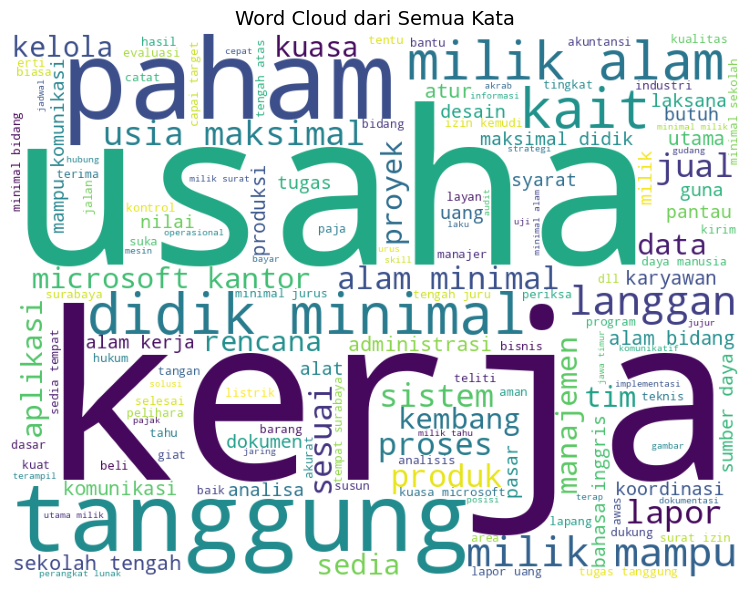

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

list_words_semua = ' '.join(word for word in df['sastrawi'])
# Membuat word cloud dari semua kata
wordcloud_semua = WordCloud(width=800, height=600,
background_color='white',
min_font_size=10).generate(list_words_semua)
# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Semua Kata', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_semua)
ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_csv("/content/Hasil_Preprocessing.csv")

In [7]:
df_final = pd.read_csv("/content/hasil_tfidf_.csv")
df_final.head()

,ab,abap,abb,abd,abersedia,abnormalitas,absah,absen,absensi,ac,...,yang,yayasan,year,yii,yng,yogyakarta,youtube,yuridis,zahir,zona
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.368157,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Memilih Variable Target & Variabel Independent
X = df_final
y = df['Label']



In [9]:
# Split data dengan perbandingan 80% train dan 20% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Jumlah Data Training', len(X_train))
print('Jumlah Data Testing', len(X_test))

Jumlah Data Training 560
Jumlah Data Testing 140


In [10]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fold 1
Akurasi:  0.8428571428571429
Presisi:  0.8469284683570398
Recall:  0.8428571428571429
F1 score:  0.8437619237880761
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      0.92      0.96        12
           2       0.82      0.90      0.86        10
           3       0.73      0.73      0.73        11
           4       0.83      0.83      0.83         6
           5       0.79      0.85      0.81        13
           6       0.88      0.88      0.88         8

    accuracy                           0.84        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.85      0.84      0.84        70

fold 2
Akurasi:  0.8
Presisi:  0.8272727272727273
Recall:  0.8
F1 score:  0.8060231257054516
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0

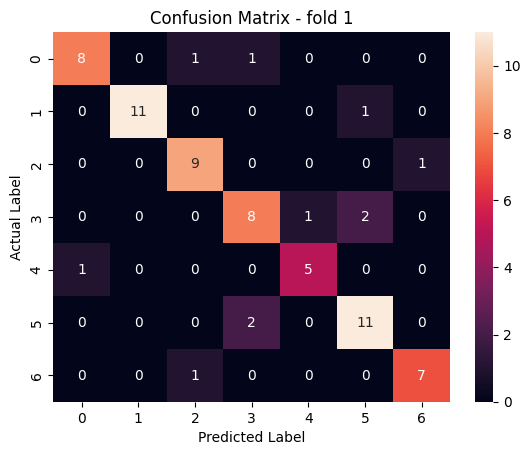

Confusion Matrix fold 2


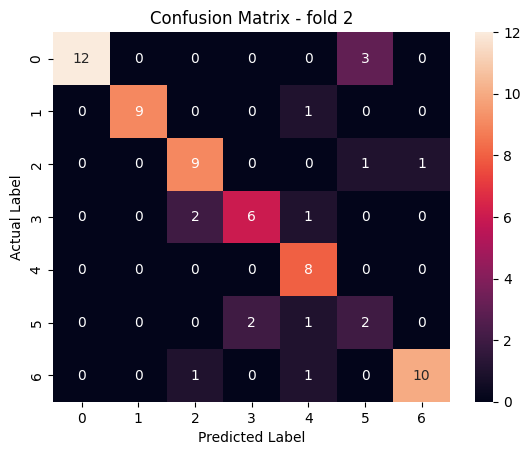

Confusion Matrix fold 3


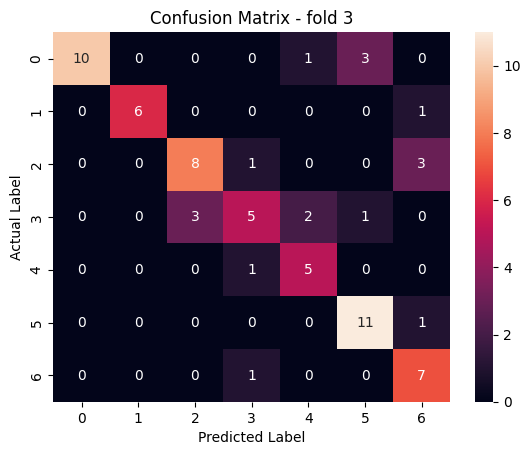

Confusion Matrix fold 4


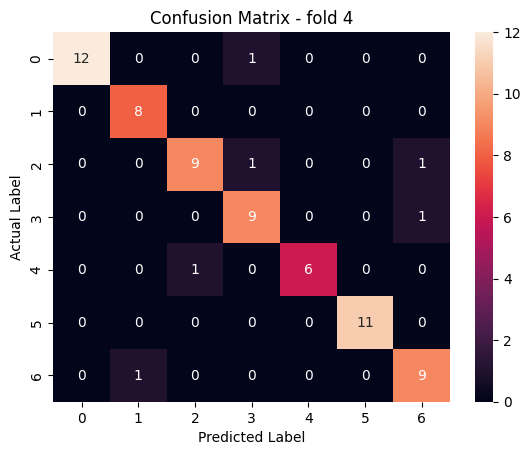

Confusion Matrix fold 5


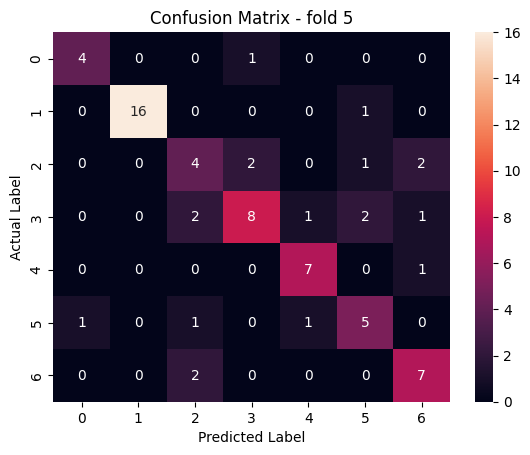

Confusion Matrix fold 6


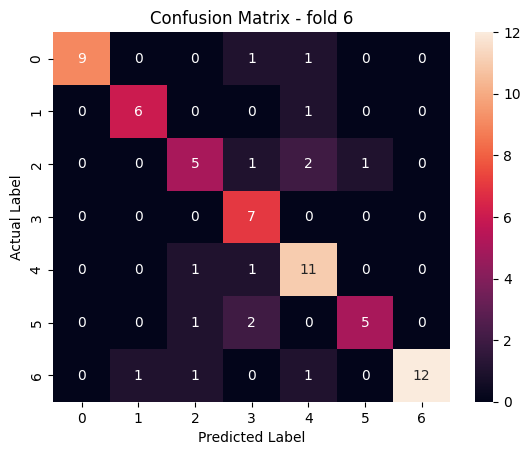

Confusion Matrix fold 7


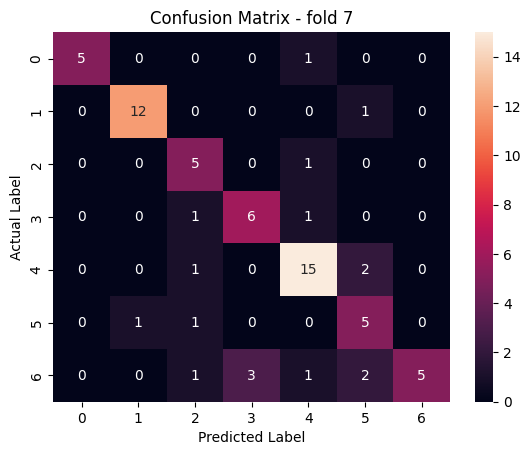

Confusion Matrix fold 8


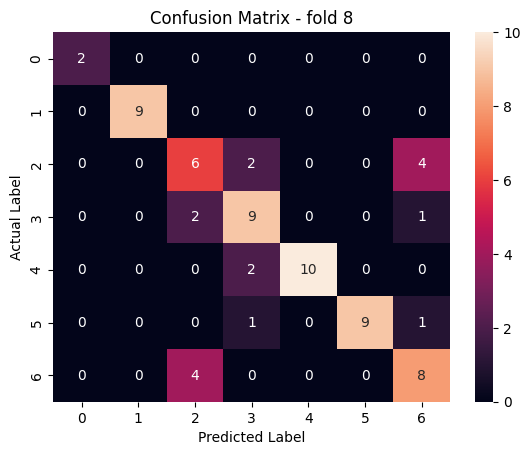

Confusion Matrix fold 9


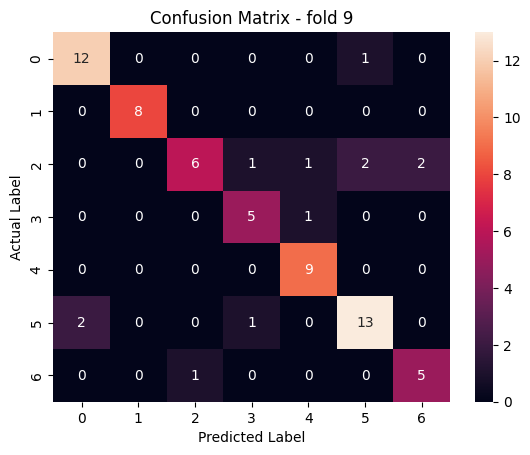

Confusion Matrix fold 10


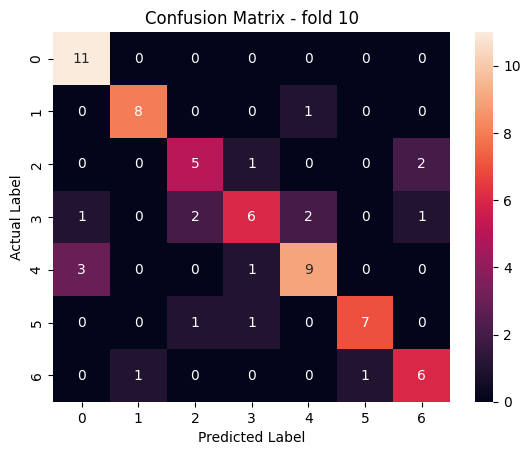

In [11]:
model_svm = SVC(C = 10, gamma = 0.1 , kernel = 'rbf',
                decision_function_shape = 'ovr')

#kfold cross validation
cv = KFold(n_splits = 10, shuffle=True, random_state=42)
n = 1
accuraci = []
precision = []
recall = []
f1_sc = []
conf_matriks = []

for i, (train_index, test_index) in enumerate (cv.split(df_final), start =1):
  X_train, X_test = df_final.iloc[train_index], df_final.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #melatih model
  svm = model_svm.fit(X_train, y_train)

  #malakukan prediksi pada data uji
  y_pred = model_svm.predict(X_test)

  #menghitung metriks evaluasi
  accuracy = accuracy_score(y_test, y_pred)
  presisi = precision_score(y_test, y_pred, average = "weighted", zero_division=1)
  recal = recall_score(y_test, y_pred, average = "weighted", zero_division=1)
  f1 = f1_score(y_test, y_pred, average = "weighted",  zero_division=1)
  report = classification_report(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  #menampilkan hasil akurasi, presisi, recall, dan f1score
  print(f'fold {i}')
  print('Akurasi: ', accuracy)
  print('Presisi: ', presisi)
  print('Recall: ', recal)
  print('F1 score: ', f1)
  print('classification report: ')
  print(report)

  #menyimpan metriks evaluasi ke dalam list
  accuraci.append(accuracy)
  precision.append(presisi)
  recall.append(recal)
  f1_sc.append(f1)
  conf_matriks.append(confusion)

#menampilkan hasil keseluruhan akurasi dari 10 fold
print('Hasil akurasi cv = 10: ', accuraci)
print('Rata-rata akurasi: ', np.mean(accuraci))

#menampilkan confusion matrix dari setiap fold
for i, cm in enumerate(conf_matriks):
  print(f'Confusion Matrix fold {i+1}')
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel("Predicted Label")
  plt.ylabel("Actual Label")
  plt.title(f"Confusion Matrix - fold {i+1}")
  plt.show()

In [12]:
#menyimpan model
import pickle

pickle.dump(svm,open('model_svm','wb'))
